In [150]:
import json
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations,combinations

In [177]:
with open("./simple_sims/history.json", 'r') as f:
    d = json.load(f)

In [178]:
len(d['V1']['value'])

2000

In [179]:
V1 = np.array(d['V1']['value'])
T1 = np.array(d['T1']['value'])
T2 = np.array(d['T2']['value'])
T3 = np.array(d['T3']['value'])
A = {name: d[name]['value'] for name in d }

In [180]:
H = np.array([V1,T1,T2,T3]).T

# The marginals

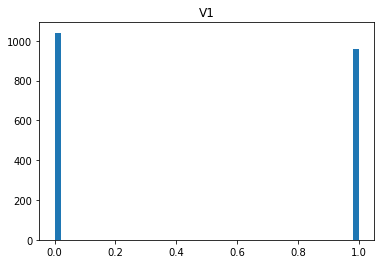

In [154]:
marginals ={}
for name in A:
    arr = np.array(A[name])
    plt.hist(arr.astype("float"),bins=50)
    plt.title(name)
    marginals[name] = np.histogram(arr.astype("float"))
    plt.show()

## The Joint Probability Distributions

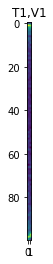

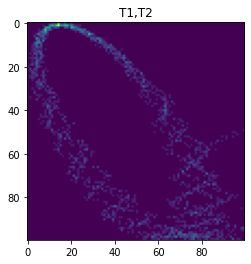

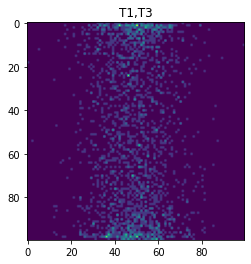

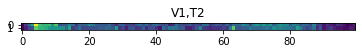

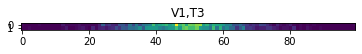

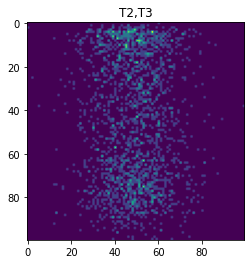

In [155]:

kinds = {"real":100,"bool":2}

doubles = list(combinations(A,2))
for n1,n2 in doubles:
    plt.title(n1 + "," + n2)
    shape = [kinds[d[n1]['kind']],kinds[d[n2]['kind']]]
    hist,e1,e2= np.histogram2d(d[n1]['value'],d[n2]['value'],bins=shape)
    plt.imshow(hist)
    plt.show()

## CPDs

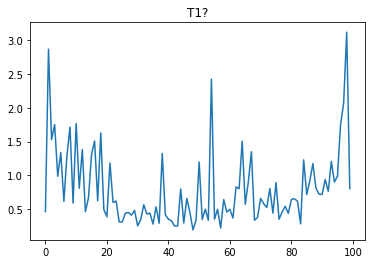

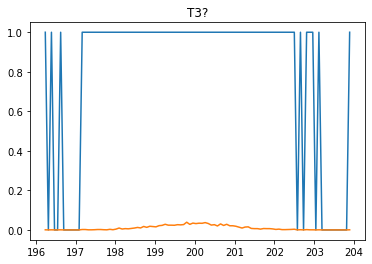

In [156]:
n1 = "T1"
n2 = "T3"

shape = [kinds[d[n1]['kind']],kinds[d[n2]['kind']]]
hist,e1,e2= np.histogram2d(d[n1]['value'],d[n2]['value'],bins=shape)
hist2,e2 = np.histogram(d[n2]['value'],bins=e2)
cpd = [hist[:,i]/(hist2[i]+1e-12) for i in range(len(hist2))]
plt.title("{}?".format(n1))
plt.plot(np.sum(cpd,axis=0))
plt.show()
plt.title("{}?".format(n2))
plt.plot(e2[:-1],np.sum(cpd,axis=1))
arr,_= np.histogram(np.array(A[n2]),e2)

plt.plot(e2[:-1],arr/sum(arr))
plt.show()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


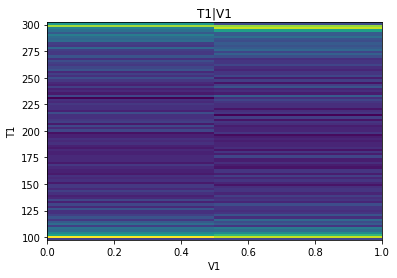

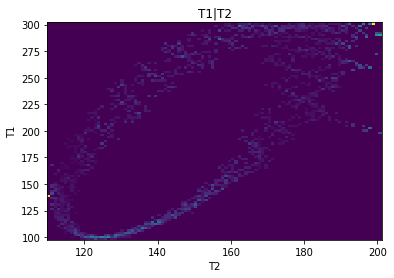

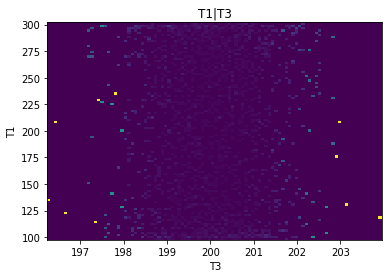

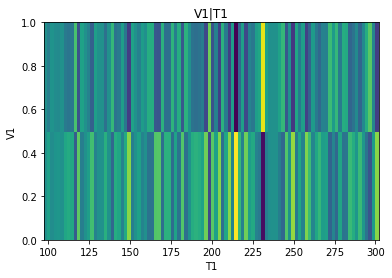

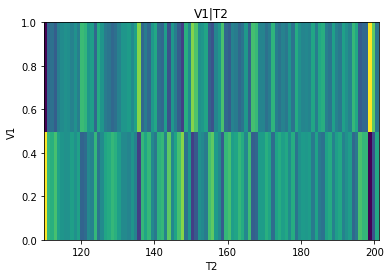

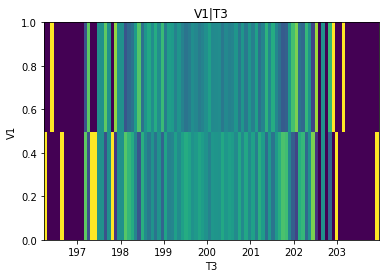

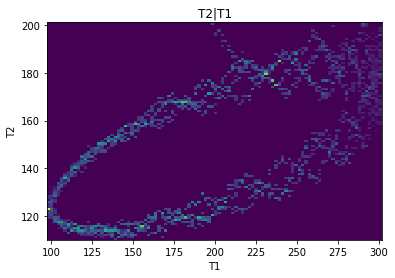

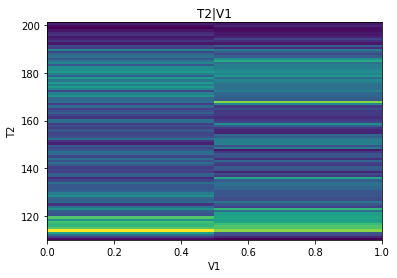

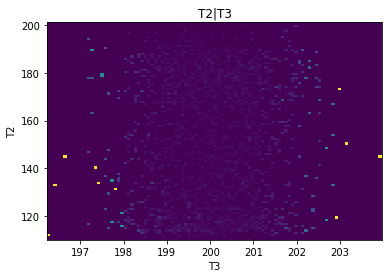

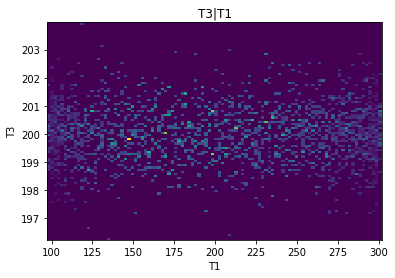

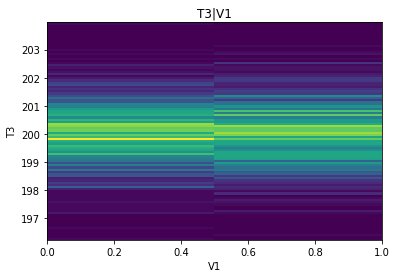

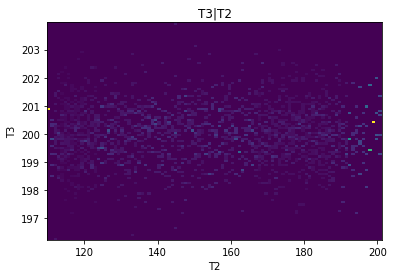

In [157]:

kinds = {"real":100,"bool":2}

doubles = list(permutations(A,2))
for n1,n2 in doubles:
    plt.title(n1 + "|" + n2)
    shape = [kinds[d[n1]['kind']],kinds[d[n2]['kind']]]
    hist,e1,e2= np.histogram2d(d[n1]['value'],d[n2]['value'],bins=shape)
    hist2,e2 = np.histogram(d[n2]['value'],bins=e2)
    cpd = np.array([hist[:,i]/(hist2[i]+1e-12) for i in range(len(hist2))])
    
    plt.pcolor(e2,e1,cpd.T)
    plt.xlabel(n2)
    plt.ylabel(n1)
    plt.show()

In [158]:
n1 = "T1"
n2 = "T2"
hist,e1,e2 = np.histogram2d(d[n1]['value'],d[n2]['value'],bins=[100,100])

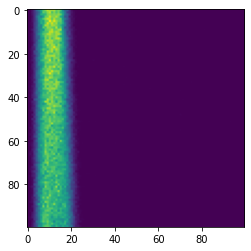

In [40]:
plt.imshow(hist);

In [ ]:
first_dist = marginals['T1']


C:\Users\Wolfram\.pyenv\pyenv-win\versions\3.6.8\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

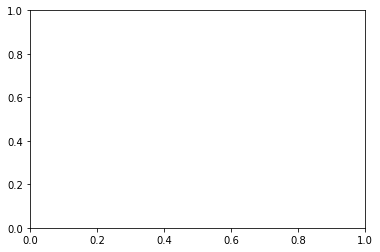

In [39]:
plt.plot(marginals['T1'])

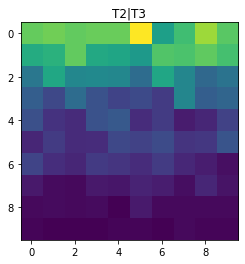

In [230]:
plt.title(n1 + "|" + n2)
plt.imshow(cpd)

In [224]:
hist

array([[56., 54., 56., 55., 50., 71., 42., 56., 63., 57.],
       [45., 44., 56., 43., 38., 38., 54., 58., 56., 54.],
       [29., 41., 34., 34., 30., 25., 44., 37., 25., 29.],
       [22., 15., 26., 18., 13., 16., 13., 37., 22., 25.],
       [18., 10.,  9., 18., 18.,  9., 13.,  6.,  8., 15.],
       [ 8., 12.,  9.,  9., 14., 14., 17., 12., 12., 20.],
       [15.,  9.,  8., 12., 10.,  9., 13.,  9.,  6.,  3.],
       [ 5.,  2.,  2.,  5.,  4.,  7.,  6.,  3.,  8.,  4.],
       [ 2.,  2.,  2.,  2.,  0.,  5.,  2.,  2.,  2.,  2.],
       [ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  1.,  1.]])

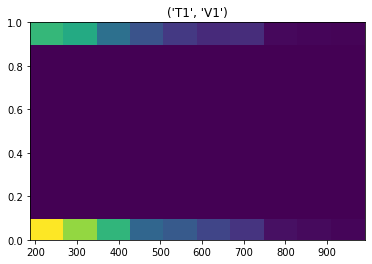

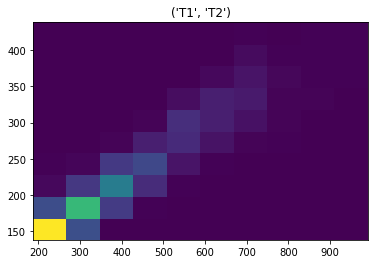

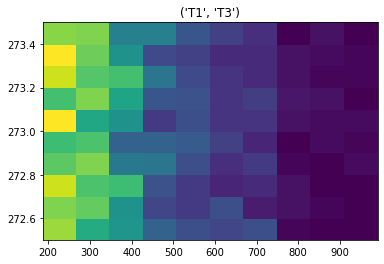

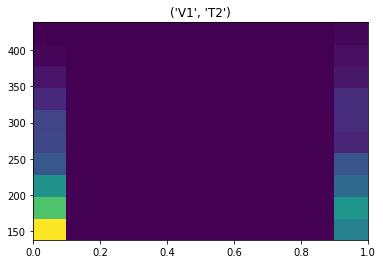

In [213]:
for n1,n2 in doubles:
    plt.title((n1,n2))
    plt.hist2d(d[n1]['value'],d[n2]['value']);
    plt.show()

# CPDs

In [179]:
np.array([v['value'] for v in d.values()])

array([[273.        , 270.46460893, 274.14787983, ..., 302.601591  ,
        290.18718812, 291.89106614],
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          1.        ,   1.        ],
       [264.35      , 256.1325    , 248.325875  , ..., 202.8177714 ,
        207.27143614, 211.34040481],
       [273.        , 272.83408664, 273.0718027 , ..., 272.60713825,
        272.6113885 , 273.3292556 ]])

In [180]:
H,E = np.histogramdd(np.array([v['value'] for v in d.values()]).T,bins=[100,2,100,100])
H = H+1e-12
H = H/np.sum(H)

In [209]:
np.sum(H[:,0,i,:])/np.sum(H[:,0,:,:]) 

0.013322231471005683

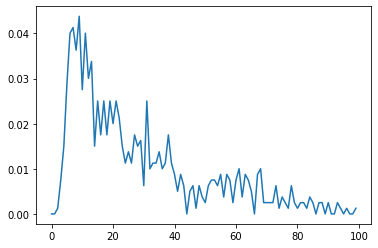

In [212]:

plt.plot([np.sum(H[:,1,i,:])/np.sum(H[:,1,:,:]) for i in range(100)])

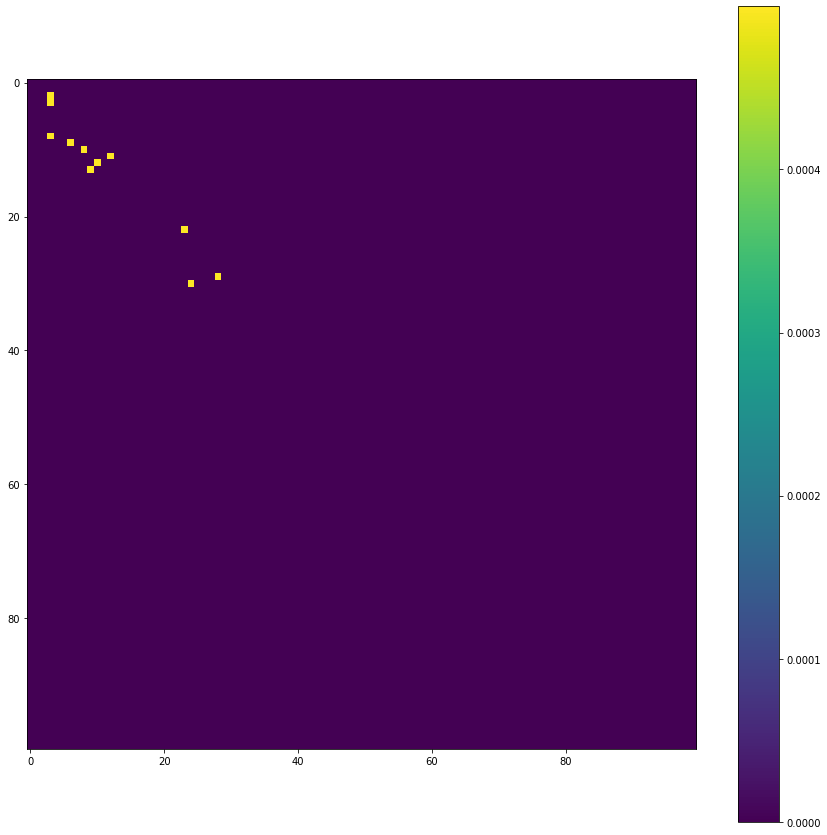

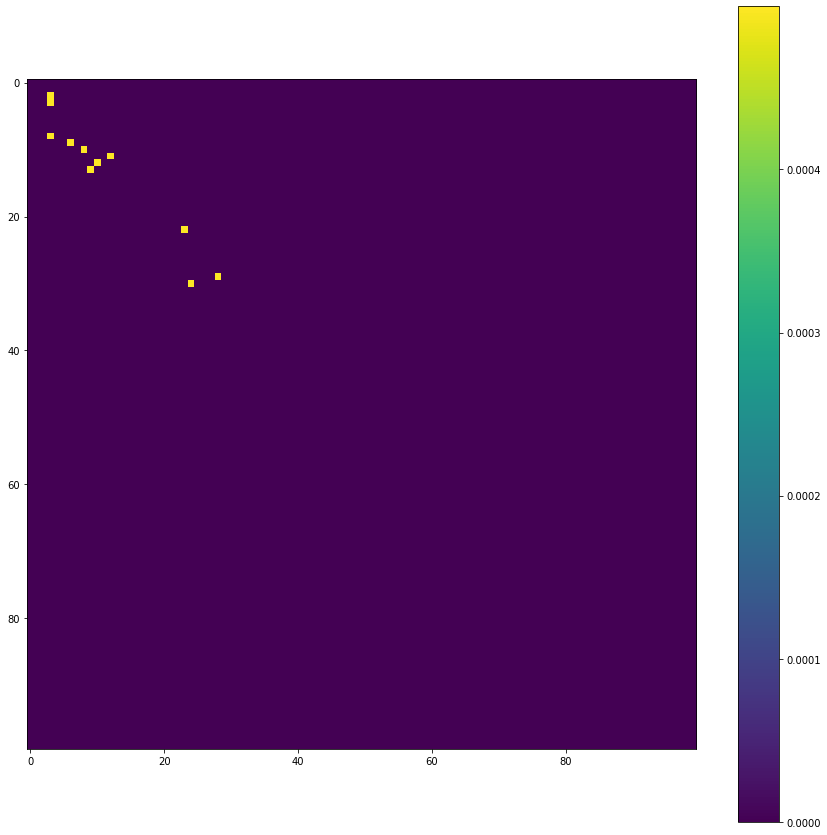

In [199]:
for i in range(2):
    plt.figure(figsize=(15,15))
    plt.imshow(H[:,0,:,34])
    plt.colorbar()
    plt.show()

In [156]:
np.sum(H[:,:,1])

0.39950000000100494

In [157]:
H = H+1e-10

In [158]:
H = H/np.sum(H[:,:,:])

In [159]:
np.sum(H[:,:,0])

0.600499798999397

In [160]:
np.sum(H[:,60,:])

0.006000008000024002

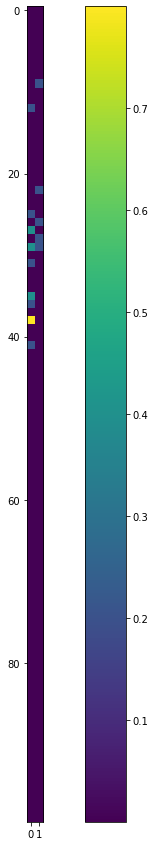

In [161]:
plt.figure(figsize=(15,15))
i = 0
plt.imshow(H[:,30,:]/np.sum(H[:,i,:]))
plt.colorbar()
plt.show()

In [162]:
np.histogramdd?

In [163]:
def find_all_possible_dependencies(Vs):
    doubles = list(combinations(Vs,2))
    possible_dependencies = []
    for double in doubles:
        for v in Vs:
            if v not in double:
                possible_dependencies.append((double,v))
    return possible_dependencies
            
    

In [46]:
possible_dependencies = find_all_possible_dependencies(A)

In [ ]:
for base_vars, conditional_var in possible_dependencies:
    

In [19]:
T1_V1 = T1[V1]
T1_nV1 = T1[~V1]

In [181]:
from sklearn.decomposition import PCA

In [182]:

m = PCA(4)

In [183]:
d = m.fit_transform(H)

In [185]:
m.explained_variance_

array([5.26613612e+03, 3.17386581e+02, 9.67602783e-01, 2.49656084e-01])

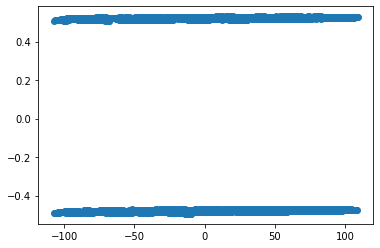

In [172]:
plt.scatter(d[:,0],d[:,2])